In [2]:
import pandas as pd
import numpy as np
from utils.config import automl_config

# Resulting Losses

Energy Dragon

In [3]:
# ED SSEA Crossover
ssea = pd.read_csv('dataset/save/ssea/best_model/best_model_test_outputs.csv')
ssea.set_index('Date', inplace=True)
ssea.index = pd.to_datetime(ssea.index)
ssea = ssea[automl_config['Borders']['Border1s'][2]: automl_config['Borders']['Border2s'][2]]
ssea.rename(columns={"Pred": "SSEA_Pred"}, inplace=True)

# ED RS
rs = pd.read_csv('dataset/save/rs/best_model/best_model_test_outputs.csv')
rs.set_index('Date', inplace=True)
rs.index = pd.to_datetime(ssea.index)
rs = rs[automl_config['Borders']['Border1s'][2]: automl_config['Borders']['Border2s'][2]]
rs.rename(columns={"Pred": "RS_Pred"}, inplace=True)

# ED SSEA Crossover CNN/MLP
ssea_models = pd.read_csv('dataset/save/ssea_models/best_model/best_model_test_outputs.csv')
ssea_models.set_index('Date', inplace=True)
ssea_models.index = pd.to_datetime(ssea_models.index)
ssea_models = ssea_models[automl_config['Borders']['Border1s'][2]: automl_config['Borders']['Border2s'][2]]
ssea_models.rename(columns={"Pred": "SSEA_Models_Pred"}, inplace=True)

# ED SSEA CNN/MLP
ssea_models_wo_ga = pd.read_csv('dataset/save/ssea_models_wo_ga/best_model/best_model_test_outputs.csv')
ssea_models_wo_ga.set_index('Date', inplace=True)
ssea_models_wo_ga.index = pd.to_datetime(ssea_models.index)
ssea_models_wo_ga = ssea_models_wo_ga[automl_config['Borders']['Border1s'][2]: automl_config['Borders']['Border2s'][2]]
ssea_models_wo_ga.rename(columns={"Pred": "SSEA_Models_wo_GA_Pred"}, inplace=True)

# ED SSEA
ssea_wo_ga = pd.read_csv('dataset/save/ssea_wo_ga/best_model/best_model_test_outputs.csv')
ssea_wo_ga.set_index('Date', inplace=True)
ssea_wo_ga.index = pd.to_datetime(ssea_models.index)
ssea_wo_ga = ssea_wo_ga[automl_config['Borders']['Border1s'][2]: automl_config['Borders']['Border2s'][2]]
ssea_wo_ga.rename(columns={"Pred": "SSEA_wo_GA_Pred"}, inplace=True)

GAM

In [8]:
gam = pd.read_csv('dataset/save/gam_prevision.csv')
gam.set_index('date', inplace=True)
gam.index = pd.to_datetime(gam.index)
gam = gam[automl_config['Borders']['Border1s'][2]: automl_config['Borders']['Border2s'][2]]
gam = gam[['conso_rte', 'EstimatedLoad']]
gam.rename(columns={"EstimatedLoad": "GAM_Pred"}, inplace=True)

AutoPytorch

In [10]:
autopytorch = pd.read_csv('dataset/save/autopytorch_prevision.csv')
autopytorch.set_index('Date', inplace=True)
autopytorch.index = pd.to_datetime(autopytorch.index)
autopytorch.rename(columns={"Pred": "AutoPytorch_Pred"}, inplace=True)
trad_autopytorch = pd.read_csv('dataset/save/trad_autopytorch_prevision.csv')
trad_autopytorch.set_index('Date', inplace=True)
trad_autopytorch.index = pd.to_datetime(trad_autopytorch.index)
trad_autopytorch.rename(columns={"Pred": "TradAutoPytorch_Pred"}, inplace=True)

CNN/MLP

In [11]:
cnn_mlp = pd.read_csv('dataset/save/cnn_mlp_prevision.csv')
cnn_mlp.set_index('date', inplace=True)
cnn_mlp.index = pd.to_datetime(cnn_mlp.index)
cnn_mlp = cnn_mlp[['CNN/MLP_Pred']]

DARTS

In [12]:
import pickle

with open('dataset/save/darts_pred.pkl', 'rb') as f:
    darts = pickle.load(f)
darts.rename(columns={"prediction": 'DARTS_Pred'}, inplace=True)

In [13]:
merged = gam.merge(ssea, left_index=True, right_index=True).drop('Actual', axis=1)
merged = merged.merge(ssea_models, left_index=True, right_index=True).drop('Actual', axis=1)
merged = merged.merge(rs, left_index=True, right_index=True).drop('Actual', axis=1)
merged = merged.merge(autopytorch, left_index=True, right_index=True).drop('Actual', axis=1)
merged = merged.merge(trad_autopytorch, left_index=True, right_index=True).drop('Actual', axis=1)
merged = merged.merge(cnn_mlp, left_index=True, right_index=True)
merged = merged.merge(darts, left_index=True, right_index=True).drop('Target', axis=1)
merged = merged.merge(ssea_models_wo_ga, left_index=True, right_index=True).drop('Actual', axis=1)
merged = merged.merge(ssea_wo_ga, left_index=True, right_index=True).drop('Actual', axis=1)

In [14]:
from utils.metrics import MAPE, RMSE

for c in merged.columns:
    if not "rte" in c:
        name = c[:-5]
        print(f"{name}: MAPE = {np.round(MAPE(merged['conso_rte'], merged[c])*100,3)}%, RMSE = {np.round(RMSE(merged['conso_rte'], merged[c]),1)}")

GAM: MAPE = 1.411%, RMSE = 929.8
SSEA: MAPE = 1.19%, RMSE = 837.8
SSEA_Models: MAPE = 1.182%, RMSE = 816.3
RS: MAPE = 1.374%, RMSE = 902.3
AutoPytorch: MAPE = 17.999%, RMSE = 10641.7
TradAutoPytorch: MAPE = 2.022%, RMSE = 1243.2
CNN/MLP: MAPE = 1.721%, RMSE = 1164.6
DARTS: MAPE = 1.6%, RMSE = 1085.6
SSEA_Models_wo_GA: MAPE = 1.131%, RMSE = 803.4
SSEA_wo_GA: MAPE = 1.258%, RMSE = 851.4


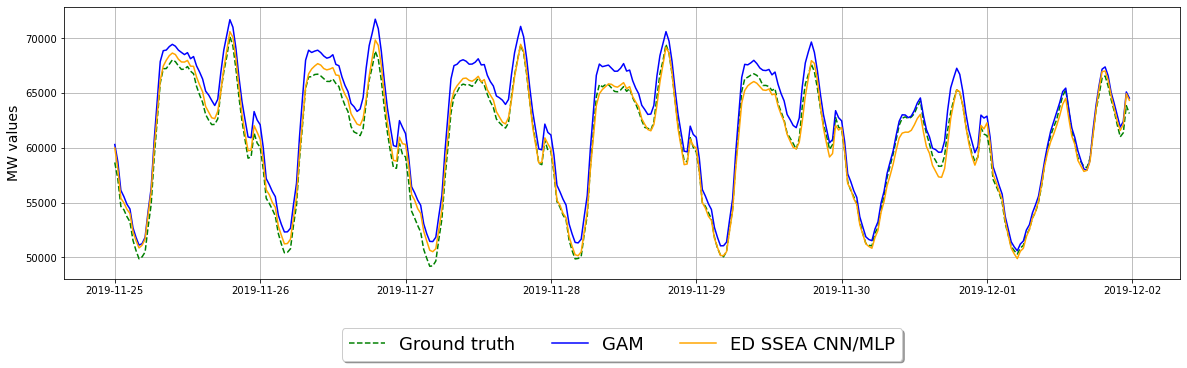

In [16]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['conso_rte'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['GAM_Pred'], c='b', label='GAM')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Models_wo_GA_Pred'], c='orange',  label='ED SSEA CNN/MLP')


plt.grid()
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/gam_vs_energydragon.pdf', bbox_inches='tight') 

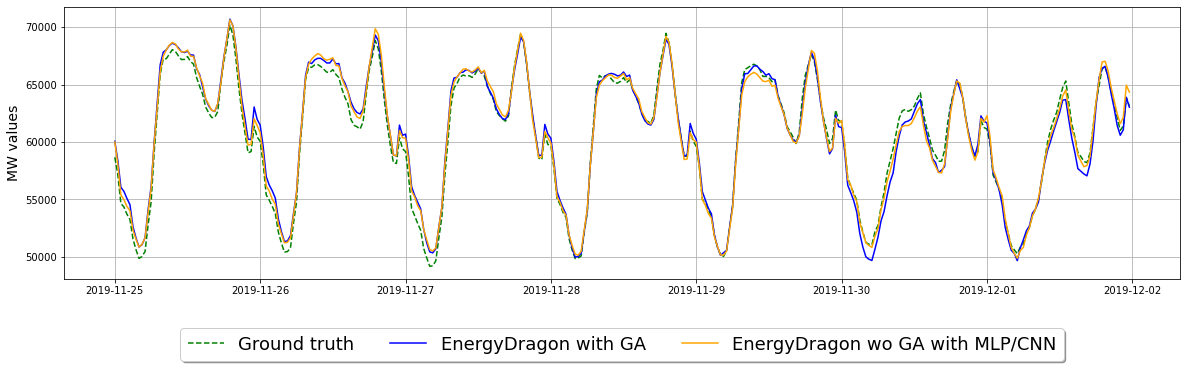

In [17]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['conso_rte'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Pred'], c='b', label='EnergyDragon with GA')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Models_wo_GA_Pred'], c='orange',  label='EnergyDragon wo GA with MLP/CNN')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/energydragon_with_mlp_vs_without.pdf')

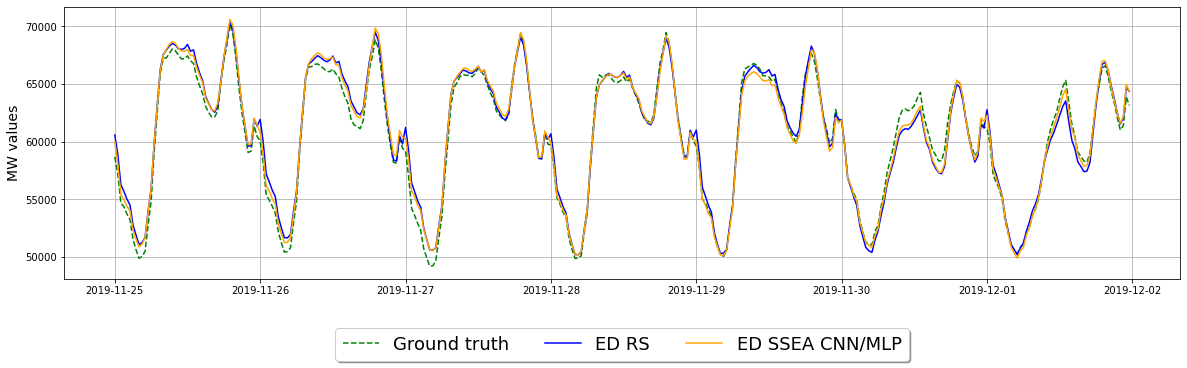

In [18]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['conso_rte'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['RS_Pred'], c='b', label='ED RS')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Models_wo_GA_Pred'], c='orange',  label='ED SSEA CNN/MLP')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/rs_vs_ssea_energydragon.pdf', bbox_inches='tight')

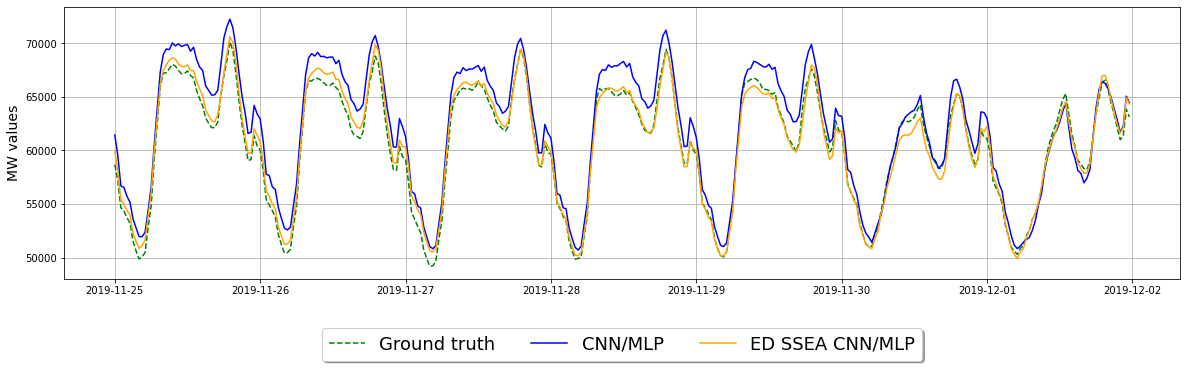

In [19]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['conso_rte'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['CNN/MLP_Pred'], c='b', label='CNN/MLP')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Models_wo_GA_Pred'], c='orange',  label='ED SSEA CNN/MLP')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/cnn_mlp_vs_energydragon.pdf', bbox_inches='tight')

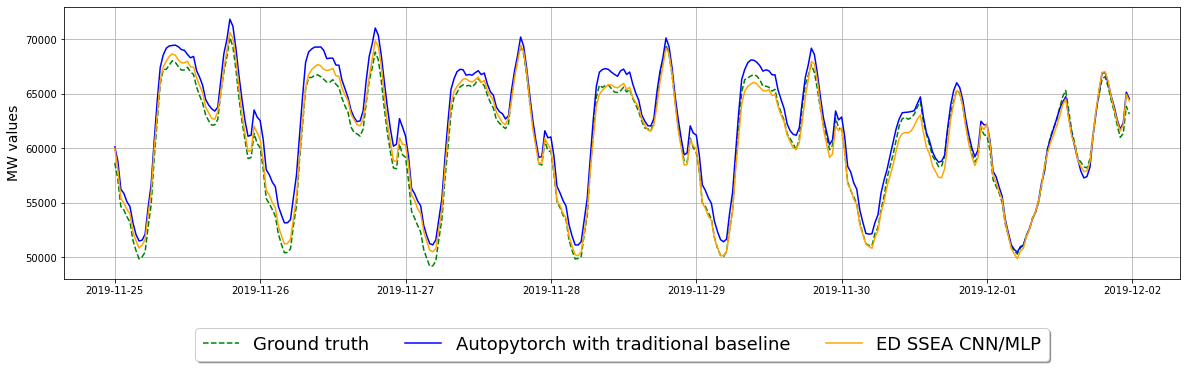

In [20]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['conso_rte'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['TradAutoPytorch_Pred'], c='b', label='Autopytorch with traditional baseline')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Models_wo_GA_Pred'], c='orange',  label='ED SSEA CNN/MLP')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/trad_autopytorch_vs_energydragon.pdf', bbox_inches='tight')

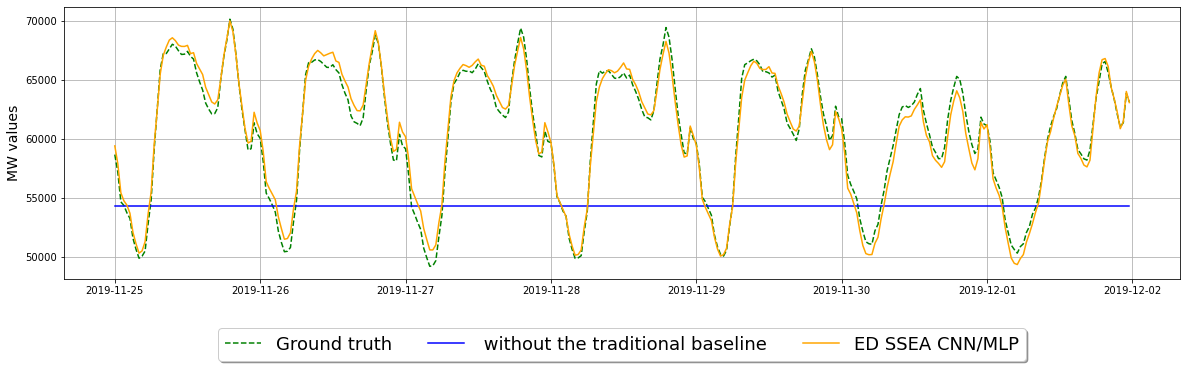

In [21]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['conso_rte'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['AutoPytorch_Pred'], c='b', label=' without the traditional baseline')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Models_Pred'], c='orange',  label='ED SSEA CNN/MLP')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/autopytorch_vs_energydragon.pdf', bbox_inches='tight')

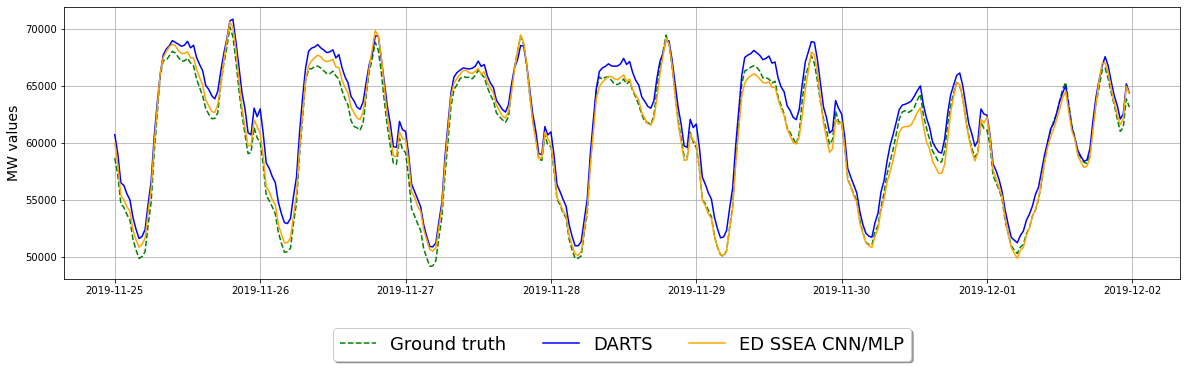

In [22]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['conso_rte'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['DARTS_Pred'], c='b', label='DARTS')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Models_wo_GA_Pred'], c='orange',  label='ED SSEA CNN/MLP')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/darts_vs_energydragon.pdf', bbox_inches='tight')

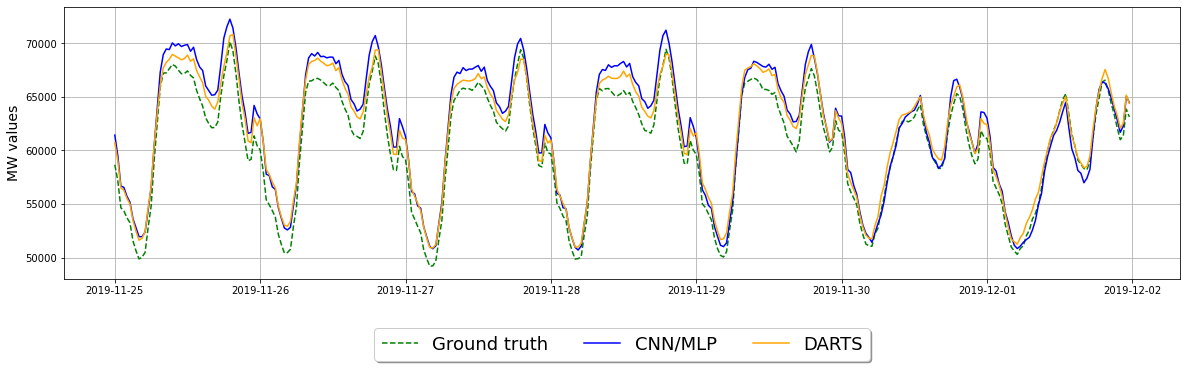

In [23]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['conso_rte'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['CNN/MLP_Pred'], c='b',  label='CNN/MLP')
plt.plot(rnn_plot.index, rnn_plot['DARTS_Pred'], c='orange', label='DARTS')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/darts_vs_cnn_mlp.pdf', bbox_inches='tight') 

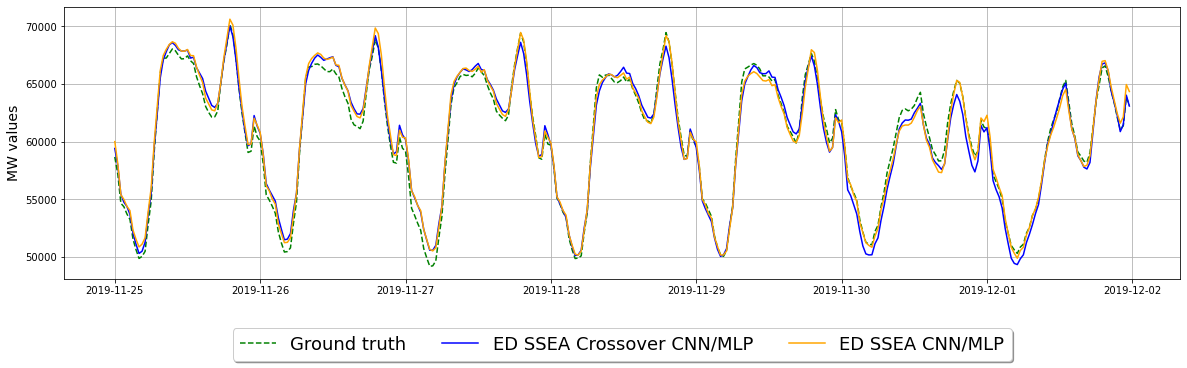

In [24]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['conso_rte'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Models_Pred'], c='b',  label='ED SSEA Crossover CNN/MLP')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Models_wo_GA_Pred'], c='orange', label='ED SSEA CNN/MLP')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/crossover_vs_without.pdf', bbox_inches='tight') 

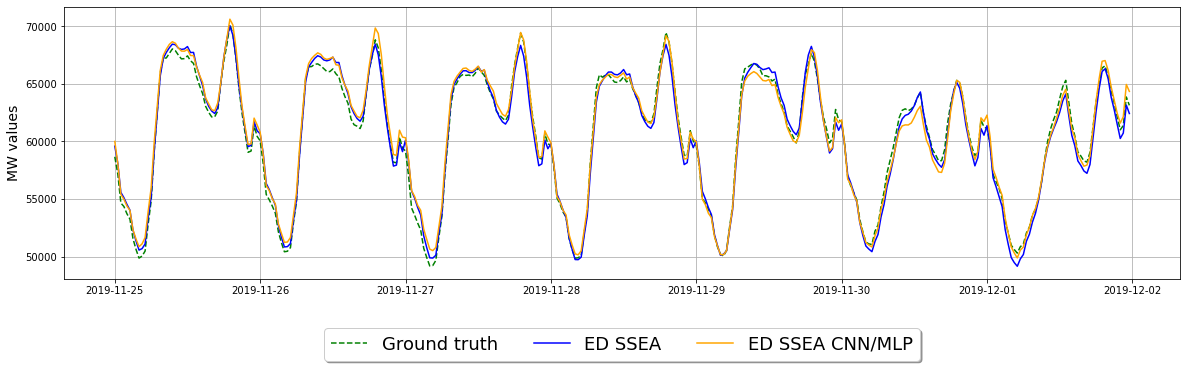

In [25]:
rnn_plot = merged[((merged.index.month==11)&(merged.index.day>24))|((merged.index.month==12)&(merged.index.day==1))]

import matplotlib.pyplot as plt

n=1000
plt.figure(figsize=(20,5))

plt.plot(rnn_plot.index, rnn_plot['conso_rte'], '--', c='g', label='Ground truth')
plt.plot(rnn_plot.index, rnn_plot['SSEA_wo_GA_Pred'], c='b',  label='ED SSEA')
plt.plot(rnn_plot.index, rnn_plot['SSEA_Models_wo_GA_Pred'], c='orange', label='ED SSEA CNN/MLP')


plt.grid()
#plt.xlabel('Dates', fontsize=14)
plt.ylabel('MW values', fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize="18") 
plt.savefig('dataset/save/figures/cnn_mlp_vs_witout.pdf', bbox_inches='tight') 

# Architectures found

In [26]:
from dragon.utils.plot_functions import load_archi, str_operations, draw_graph, get_name_features


ssea_models_model = load_archi("dataset/save/ssea_models/best_model/x.pkl")
ssea_models_features = get_name_features(ssea_models_model[0], automl_config)
m1 = ssea_models_model[1].matrix
n1 = str_operations(ssea_models_model[1].operations)
m2 = ssea_models_model[2].matrix
n2 = str_operations(ssea_models_model[2].operations)

graph = draw_graph(n1, m1, n2, m2, "dataset/save/figures/ssea_models")
print(ssea_models_features)

['f_0', 'f_1', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_12', 'f_15', 'f_21', 'f_22', 'f_24', 'f_28', 'f_29', 'f_30']


! SyncTeX Error : No file?


In [27]:
ssea_model = load_archi("dataset/save/ssea/best_model/x.pkl")
ssea_features = get_name_features(ssea_model[0], automl_config)
m1 = ssea_model[1].matrix
n1 = str_operations(ssea_model[1].operations)
m2 = ssea_model[2].matrix
n2 = str_operations(ssea_model[2].operations)

graph = draw_graph(n1, m1, n2, m2, "dataset/save/figures/ssea")
print(ssea_features)

['f_2', 'f_3', 'f_4', 'f_5', 'f_10', 'f_12', 'f_13', 'f_23', 'f_26', 'f_28']


! SyncTeX Error : No file?


In [28]:
rs_model = load_archi("dataset/save/rs/best_model/x.pkl")
rs_features = get_name_features(rs_model[0], automl_config)
m1 = rs_model[1].matrix
n1 = str_operations(rs_model[1].operations)
m2 = rs_model[2].matrix
n2 = str_operations(rs_model[2].operations)

graph = draw_graph(n1, m1, n2, m2, "dataset/save/figures/rs")
print(rs_features)

['f_1', 'f_2', 'f_4', 'f_5', 'f_6', 'f_8', 'f_12', 'f_15', 'f_17', 'f_19', 'f_22', 'f_24', 'f_25', 'f_26']


! SyncTeX Error : No file?


In [30]:
from main_energy_dragon import generate_old_models

cnn_mlp_model = generate_old_models(automl_config)[0]
cnn_mlp_features = get_name_features(cnn_mlp_model[0], automl_config)
m1 = cnn_mlp_model[1].matrix
n1 = str_operations(cnn_mlp_model[1].operations)
m2 = cnn_mlp_model[2].matrix
n2 = str_operations(cnn_mlp_model[2].operations)

graph = draw_graph(n1, m1, n2, m2, "dataset/save/figures/cnn_mlp")
print(cnn_mlp_features)

['f_4', 'f_6', 'f_7', 'f_10', 'f_11', 'f_13', 'f_15', 'f_20', 'f_23', 'f_24', 'f_25', 'f_28', 'f_29']


! SyncTeX Error : No file?


In [43]:
ssea_models_wo_ga_model = load_archi("dataset/save/ssea_models_wo_ga/best_model/x.pkl")
ssea_models_wo_ga_features = get_name_features(ssea_models_wo_ga_model[0], automl_config)
m1 = ssea_models_wo_ga_model[1].matrix
n1 = str_operations(ssea_models_wo_ga_model[1].operations)
m2 = ssea_models_wo_ga_model[2].matrix
n2 = str_operations(ssea_models_wo_ga_model[2].operations)

graph = draw_graph(n1, m1, n2, m2, "dataset/save/figures/ssea_models_wo_ga")
print(ssea_models_wo_ga_features)

['f_0', 'f_5', 'f_6', 'f_7', 'f_9', 'f_10', 'f_11', 'f_12', 'f_15', 'f_19', 'f_21', 'f_24', 'f_28']


! SyncTeX Error : No file?


In [42]:
ssea_wo_ga_model = load_archi("dataset/save/ssea_wo_ga/best_model/x.pkl")
ssea_wo_ga_features = get_name_features(ssea_wo_ga_model[0], automl_config)
m1 = ssea_wo_ga_model[1].matrix
n1 = str_operations(ssea_wo_ga_model[1].operations)
m2 = ssea_wo_ga_model[2].matrix
n2 = str_operations(ssea_wo_ga_model[2].operations)

graph = draw_graph(n1, m1, n2, m2, "dataset/save/figures/ssea_wo_ga")
print(ssea_wo_ga_features)

['f_1', 'f_3', 'f_5', 'f_6', 'f_7', 'f_9', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_18', 'f_19', 'f_21', 'f_23', 'f_24', 'f_26']


! SyncTeX Error : No file?


# Features

In [33]:
f_features = {}
f_features["GAM"] = ['f_8', 'f_10', 'f_11', 'f_12', 'f_13', 'f_15', 'f_17', 'f_22', 'f_24', 'f_24', 'f_27', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33']
f_features['ED RS'] = rs_features
f_features["ED SSEA"] = ssea_wo_ga_features
f_features["ED SSEA Crossover"] = ssea_features
f_features["ED SSEA Crossover CNN/MLP"] = ssea_models_features
f_features['ED SSEA CNN/MLP'] = ssea_models_wo_ga_features
f_features['CNN/MLP'] = cnn_mlp_features


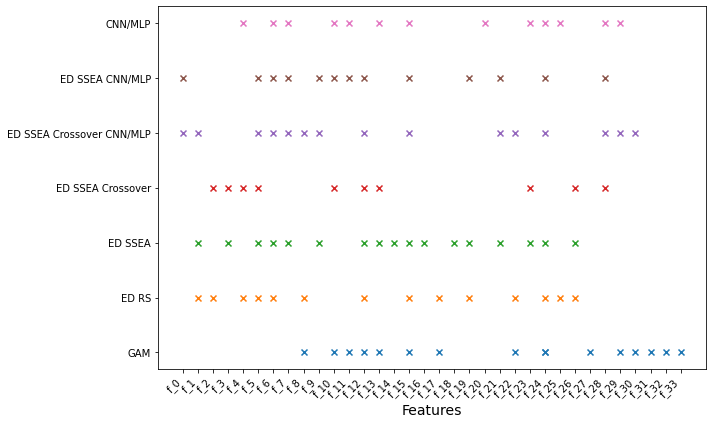

In [40]:
plt.figure(figsize=(10, 6))
main_list = [f"f_{i}" for i in range(34)]

for i, name in enumerate(f_features):
    sublist = f_features[name]
    y = [i] * len(sublist)  # ordonnée différente pour chaque sous-liste
    x = [main_list.index(item) for item in sublist]  # abscisse selon l'index dans la liste principale
    plt.scatter(x, y, marker='x', label=f'{name}')

plt.yticks(range(len(f_features)), [f'{k}' for k in f_features.keys()])
plt.xticks(range(len(main_list)), main_list, rotation=45, ha='right')
plt.xlabel('Features', fontsize=14)
plt.tight_layout()
plt.savefig('dataset/save/figures/features_by_model.pdf', bbox_inches='tight')
plt.show()


# Convergence

In [36]:
def summary_outfile(path, name):
    timestamps = []
    losses = []
    min_loss = np.inf
    rs_over = True
    with open(path) as f:
        lines_list = f.readlines()
        for i, l in enumerate(lines_list):
            if not rs_over:
                if "Sending individual" in l:
                    l_split = l.split(" ")
                    idx = int(l_split[7])
                    if idx==99:
                        rs_over=True
            else:
                if "criterium on test dataset:" in l:
                    l_split = l.split("|")
                    ts = l_split[0][:-1]
                    l_split = l.split(" ")
                    loss = float(l_split[-1])
                    if loss < min_loss:
                        min_loss = loss
                        timestamps.append(ts)
                        losses.append(loss)
    df_ssea = pd.DataFrame()
    df_ssea['TimeStamps'] = timestamps
    df_ssea[name] = losses
    #df_ssea[name] = df_ssea[name].cummin()
    df_ssea['TimeStamps'] = pd.to_datetime(df_ssea['TimeStamps'])
    df_ssea.set_index("TimeStamps", inplace=True)
    
    df_ssea.index = (df_ssea.index - df_ssea.index[0]).total_seconds()
    df_ssea = df_ssea[df_ssea.index<3600*24]
    df_ssea.index = df_ssea.index/3600
    df_ssea.index = df_ssea.index.astype(float).to_series().round(3)
    df_ssea.reset_index(drop=False, inplace=True)
    return df_ssea

In [37]:
df_ssea = summary_outfile("dataset/save/ssea.out", "SSEA Crossover")
df_rs = summary_outfile('dataset/save/rs.out', "RS")
df_ssea_wo_ga = summary_outfile('dataset/save/ssea_wo_ga.out', "SSEA")
df_ssea_models_wo_ga = summary_outfile('dataset/save/ssea_wo_ga_models.out', "SSEA CNN/MLP")
df_ssea_models = summary_outfile('dataset/save/ssea_models.out', "SSEA Crossover CNN/MLP")


In [38]:
merged = df_ssea.merge(df_rs, how="outer")
merged = merged.merge(df_ssea_wo_ga, how="outer")
merged = merged.merge(df_ssea_models_wo_ga, how="outer")
merged = merged.merge(df_ssea_models, how="outer")
merged.sort_values(by="TimeStamps", inplace=True)
merged.fillna(method="ffill", inplace=True)
merged.set_index('TimeStamps', inplace=True)


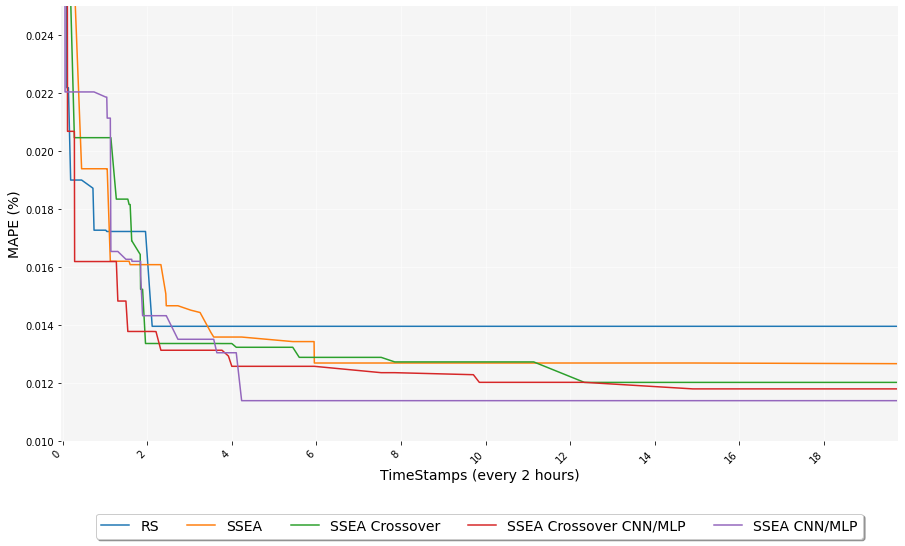

In [41]:
plt.rc('font', family='sans-serif')    
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor((0.96, 0.96, 0.96))
plt.margins(x=20e-4)

df = merged[['RS', 'SSEA', 'SSEA Crossover', 'SSEA Crossover CNN/MLP', 'SSEA CNN/MLP']]

# Tracer le graphique
for c in df.columns:
    plt.plot(df.index, df[c], label=c)

# Réglez le format de l'axe des x pour afficher toutes les 15 minutes
plt.xticks(df.index, rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

# Étiquettes et titre
plt.xlabel('TimeStamps (every 2 hours)', fontsize=14)
plt.ylabel('MAPE (%)', fontsize=14)
#plt.title('Runtime of the first 5 generations', fontsize=30, pad=20)
#plt.hlines(y=[3,37], xmin=df['TimeStamps'].min()-1, xmax=df['TimeStamps'].max()+1, linestyles="dashed", color="grey")
plt.ylim(top=0.025, bottom=0.01)
plt.grid(color='white', lw = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5, fontsize="14") 
plt.savefig('dataset/save/figures/convergence_energy_dragon.pdf', bbox_inches='tight') 